In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 1 (K-means)

In [2]:
np.random.seed(42)

N = 500
weights = [0.2, 0.5, 0.3]
mean = np.array([[0,0], [3,0], [0,3]])
cov = np.array([[1,0],[0,1]])

data =  np.empty((0,2), int)
index = np.random.choice([0,1,2], N, p= weights)

for i in index:
    sample = np.random.multivariate_normal(mean[index[i]], cov, 1)
    data = np.append(data, sample, axis=0)

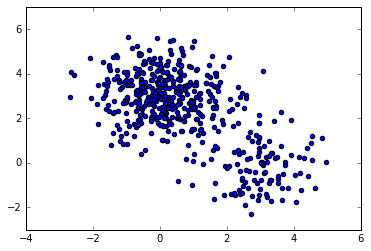

In [3]:
plt.scatter(data[:,0],data[:,1])

### K-means funcitons

In [ ]:
#http://flothesof.github.io/k-means-numpy.html

In [4]:
def initialize_centroids(data, k):
    """returns k centroids from the initial points"""
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [29]:
def kmeans(data, k, centroids, iteration):

    centroids_array = np.zeros([0,2])
    for i in range(iteration):
        distance = np.zeros([data.shape[0],])
        n = np.zeros([1,])

        for i in range(k):
            d = np.linalg.norm((data - centroids[i,:]), axis=1)
            distance = np.vstack((distance, d))
        distance = np.delete(distance, (0), axis=0)

        for i in np.arange(500):
            a = np.where(distance[:,i] == distance[:,i].min())[0]
            n = np.vstack((n,a))
        n = np.delete(n, (0), axis=0)
        n = n.reshape(500,)

        centroids = np.array([data[n==k].mean(axis=0) for k in range(centroids.shape[0])])
#         centroids_array = np.vstack((centroids_array, centroids))
    return n, centroids

## 1-a

## 1-b

/Users/Amiros/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: Mean of empty slice.
/Users/Amiros/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


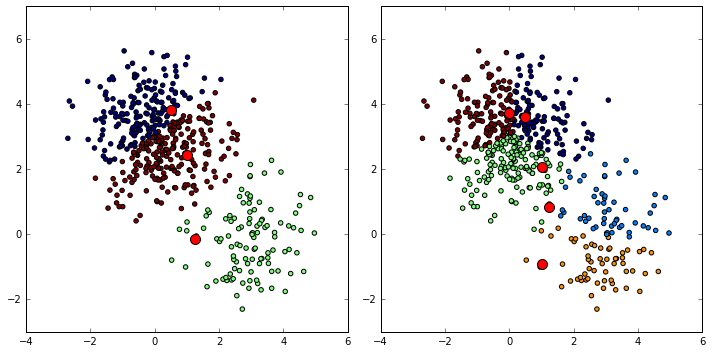

In [53]:
centroids = initialize_centroids(data, 5)

clusters_5, centroids_poisition_5 = kmeans(data,5, centroids, 20)
clusters_3, centroids_poisition_3 = kmeans(data,3, centroids, 20)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
figsize=(15, 10)
ax[1].scatter(data[:, 0], data[:, 1], c=clusters_5)
ax[1].scatter(centroids[:, 0], centroids_poisition_5[:, 1], c='r', s=100)

ax[0].scatter(data[:, 0], data[:, 1], c=clusters_3)
ax[0].scatter(centroids[:, 0], centroids_poisition_3[:, 1], c='r', s=100)
fig.tight_layout()

# Problem 2 (Matrix factorization)